# TF OD model evaluation of xView

Currently, only model version 2.0 of Xview performs decently. Therefore, the following model evaluation will only use model weight from version 2.0. 

For more information aournd model versions, please see [the link](https://github.com/NASA-IMPACT/covid-satellite-ml/issues/4#issuecomment-634013171).

### Training data

Training dataset for xView and Dota were splitted into 70:20:10. 70% of data is train data, 20% for model validation. The following model validation (e.g. average_precision) is done on the 20% during the model training. 

We created 3 model iteration so far, and two ongoing. It will be 5 model iterations. 
Currently model iteration number 2 acchieved a good performance. 

To acchieve current model performance, we have done:
- color enhanced on original WV-3 images, to make the objects stand out from the background; 
- downsample the WV-3 images to the spatial resolution closes to Planet Skysat;
- remove a lot of training image chips that have no data, or half blank; 


| no-color-enhanced | color-enhanced | labels|
|--- | --- | --- | 
|![120576-78673-17](https://user-images.githubusercontent.com/14057932/82902282-3a60f980-9f2d-11ea-8ffc-2f489f38888b.jpg) | ![120576-78673-17](https://user-images.githubusercontent.com/14057932/82902305-41880780-9f2d-11ea-97a0-b994937ff008.jpg) | ![120576-78673-17](https://user-images.githubusercontent.com/14057932/82902339-4fd62380-9f2d-11ea-96b7-366dc8d987fd.png)|
|![109321-57089-17](https://user-images.githubusercontent.com/14057932/82902441-74320000-9f2d-11ea-917c-83614e47fbaa.jpg)|![109321-57089-17](https://user-images.githubusercontent.com/14057932/82902472-7e53fe80-9f2d-11ea-88fc-ea24df34746c.jpg)|![109321-57089-17](https://user-images.githubusercontent.com/14057932/82902508-8c098400-9f2d-11ea-91d3-2157997ea43b.png) |
|![109339-57069-17](https://user-images.githubusercontent.com/14057932/82902795-020deb00-9f2e-11ea-88ac-3791de21ecd9.jpg)| ![109339-57069-17](https://user-images.githubusercontent.com/14057932/82902808-089c6280-9f2e-11ea-9cd0-5a449c5c8279.jpg)|![109339-57069-17](https://user-images.githubusercontent.com/14057932/82902836-1225ca80-9f2e-11ea-96de-5a920e3c9d7f.png)|
|![120576-78686-17](https://user-images.githubusercontent.com/14057932/82903008-4f8a5800-9f2e-11ea-80f9-c557f1c856e4.jpg) | ![120576-78686-17](https://user-images.githubusercontent.com/14057932/82903027-56b16600-9f2e-11ea-9d43-46a6076cb1c6.jpg) |![120576-78686-17](https://user-images.githubusercontent.com/14057932/82903043-5e710a80-9f2e-11ea-8026-7396aa7ff0c9.png)|

### Model performance

The model perfromance of Resnet101 at step 30846 is:

```
I0526 18:09:58.297795 140609894336256 object_detection_evaluation.py:1311] average_precision: 0.33823 - Plane
I0526 18:09:58.327689 140609894336256 object_detection_evaluation.py:1311] average_precision: 0.05705 - Energy
I0526 18:09:58.348865 140609894336256 object_detection_evaluation.py:1311] average_precision: 0.11098 - Construction
I0526 18:09:58.379168 140609894336256 object_detection_evaluation.py:1311] average_precision: 0.13931 - Truck
I0526 18:09:58.415370 140609894336256 object_detection_evaluation.py:1311] average_precision: 0.22392 - Small-vehicle
I0526 18:09:58.429719 140609894336256 object_detection_evaluation.py:1311] average_precision: 0.05987 - Large-vehicle
I0526 18:09:58.433696 140609894336256 object_detection_evaluation.py:1311] average_precision: 0.21754 - Ship
```




In [1]:
%matplotlib inline
import os 
from os import makedirs, path as op

import pandas as pd


import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

sns.set_context("notebook", font_scale=1.5)
sns.set_style("darkgrid")


In [ ]:
path = "../work_station_covid_ml/label-maker/training_data_7cls_csvs"
train_csvs = [op.join(path, csv) for csv in os.listdir(path) if csv.endswith('.csv')]
train_csvs

In [8]:
def concate_dfs(lst_csv):
    dfs = []
    for csv in lst_csv:
        df=pd.read_csv(csv)
        dfs.append(df)
    final_df = pd.concat(dfs)
    return final_df

In [ ]:
df_all = concate_dfs(train_csvs)
df_all.head()

In [ ]:
clsses_number = df_all.groupby('class').count()
clsses_number

small-vehicle: 39980
trucks: 5110
large-vehicle: 2192
ship: 851
construction: 695
energy: 413
plane: 133
helicopter: 11


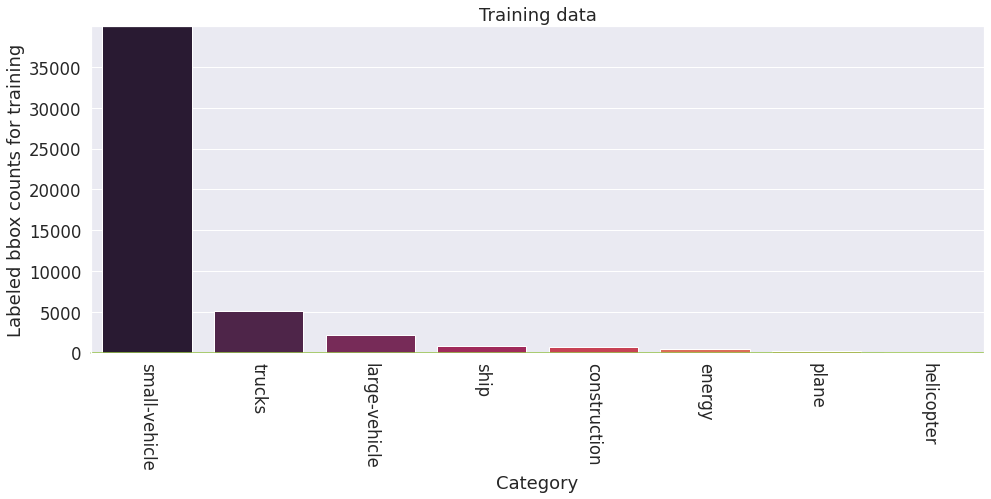

In [11]:
# Plot training number
fig, ax = plt.subplots(figsize=(16, 6))

sort_df = clsses_number.sort_values(by='class_id', ascending=False)
x_names = list(sort_df.index)
y_vals = list(sort_df['class_id'])


_ = sns.barplot(x=x_names, y=y_vals, palette="rocket", ax=ax)

# Print out the raw performance data

for x_name, y_val in zip(x_names, y_vals):
    print(f'{x_name}: {y_val}')

current_palette = matplotlib.colors.hex2color('#86b92e')

ax.axhline(0, color=current_palette, clip_on=False)
ax.set_ylim([0, max(sort_df['class_id'])])
ax.set_ylabel("Labeled bbox counts for training")
ax.set_xlabel("Category")
ax.set_title("Training data")
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=270)

In [15]:
clsses_number['map'] = [0.11098, 0.05705, 0.33823, 0.05987, 0.33823, 0.21754, 0.22392, 0.13931]
clsses_number['class'] = list(clsses_number.index)
clsses_number

,Unnamed: 0,filename,width,height,class_id,xmin,ymin,xmax,ymax,map,class
class,,,,,,,,,,,
construction,695,695,695,695,695,695,695,695,695,0.11098,construction
energy,413,413,413,413,413,413,413,413,413,0.05705,energy
helicopter,11,11,11,11,11,11,11,11,11,0.33823,helicopter
large-vehicle,2192,2192,2192,2192,2192,2192,2192,2192,2192,0.05987,large-vehicle
plane,133,133,133,133,133,133,133,133,133,0.33823,plane
ship,851,851,851,851,851,851,851,851,851,0.21754,ship
small-vehicle,39980,39980,39980,39980,39980,39980,39980,39980,39980,0.22392,small-vehicle
trucks,5110,5110,5110,5110,5110,5110,5110,5110,5110,0.13931,trucks


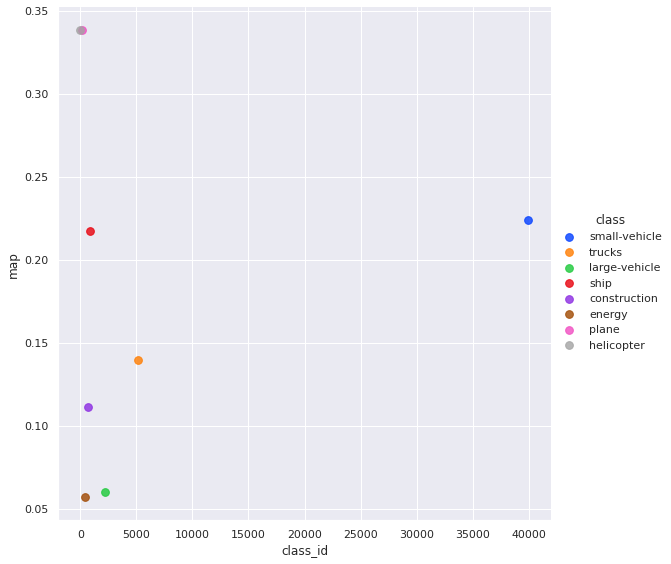

In [19]:
sort_cls_train_df = clsses_number.sort_values(by='class_id', ascending=False)

sns.set(style="darkgrid")
sns.lmplot(x='class_id', y='map', hue="class", palette="bright",
            height=8, data=sort_cls_train_df, scatter_kws={'s': 60})

### ML road map for next step

#### Model version 3.0 (on-going)
Geotiffs were color brighten and enhanced;
recreate VRT for all the Geotiffs;
adding labels in central America;
Remove all the tiles that are blank and file size smaller than 7kb.
training classes included plane, energy, construction, trucks, small-vehicle, large-vehicle, and ship. I also combine helicopter to plane.

#### Model version 4.0 (on-going)
Xview + data training data that only narrow down to plane, trucks, small-vehicle, large-vehicle, ship, helicopter

We will update the model performance accordingly.